In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("datasets/SOCR-HeightWeight.csv")

In [3]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


Text(0, 0.5, 'Weight')

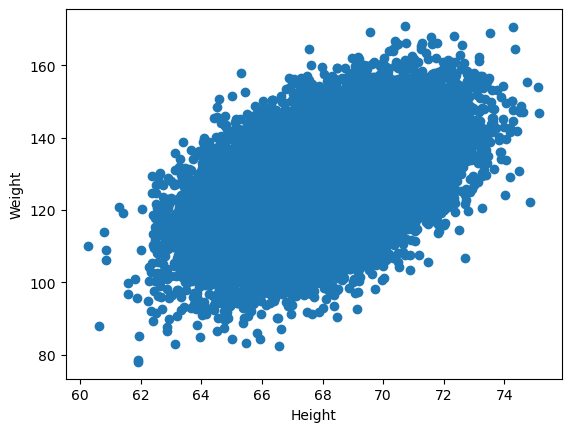

In [22]:
plt.scatter(df['Height(Inches)'],df['Weight(Pounds)'])
plt.xlabel("Height")
plt.ylabel("Weight")

In [16]:
df.corr()

,Index,Height(Inches),Weight(Pounds)
Index,1.000000,0.009626,-0.007257
Height(Inches),0.009626,1.000000,0.502859
Weight(Pounds),-0.007257,0.502859,1.000000


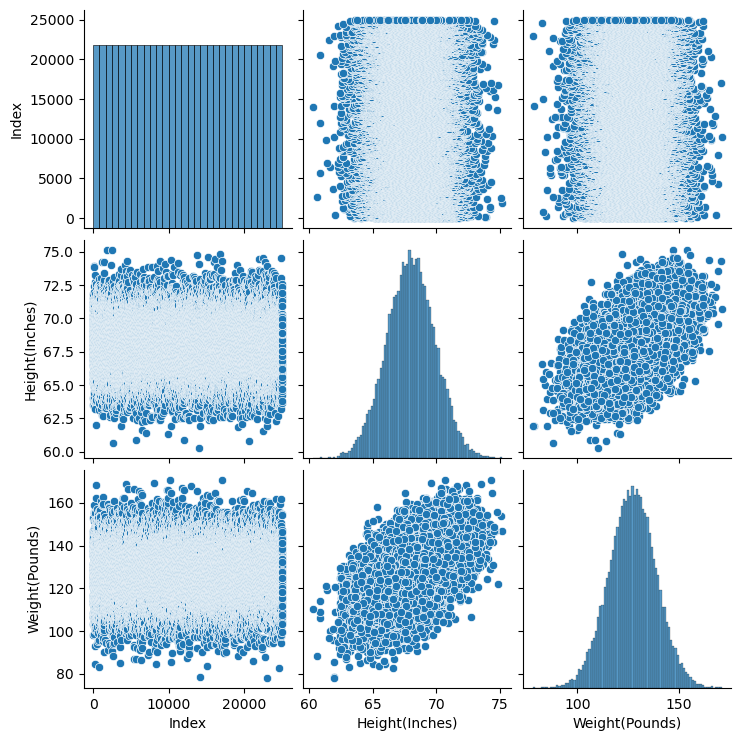

In [20]:
import seaborn as sns
sns.pairplot(df)

In [34]:
X,y = df[['Weight(Pounds)']], df['Height(Inches)']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [38]:
y_train

6920     69.97280
17926    65.59616
1123     65.24285
4518     67.80062
5576     70.50871
           ...   
21575    67.48875
5390     66.92527
860      68.39347
15795    69.29711
23654    67.12804
Name: Height(Inches), Length: 18750, dtype: float64

In [40]:
X_train

,Weight(Pounds)
6920,128.0357
17926,115.5202
1123,132.8885
4518,120.5416
5576,122.7718
...,...
21575,111.5242
5390,123.4431
860,120.9809
15795,135.6468


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

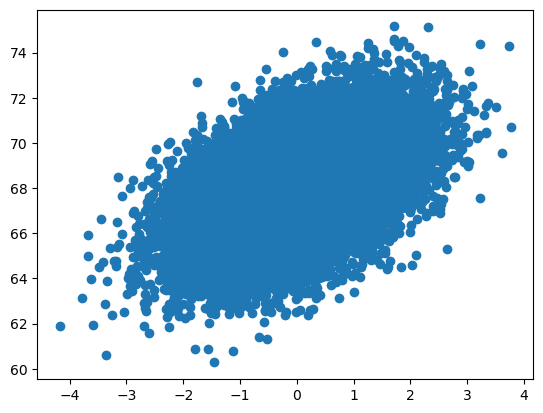

In [44]:
plt.scatter(X_train,y_train)

In [46]:
from sklearn.linear_model import LinearRegression

In [48]:
regression = LinearRegression()

In [50]:
regression

LinearRegression()

In [52]:
type(X_train)

numpy.ndarray

In [54]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [56]:

y_train.shape

(18750,)

In [58]:
regression.fit(X_train,y_train)

LinearRegression()

In [60]:
print("coffecient",regression.coef_)
print("intercept",regression.intercept_)

coffecient [0.94883892]
intercept 67.9938252704


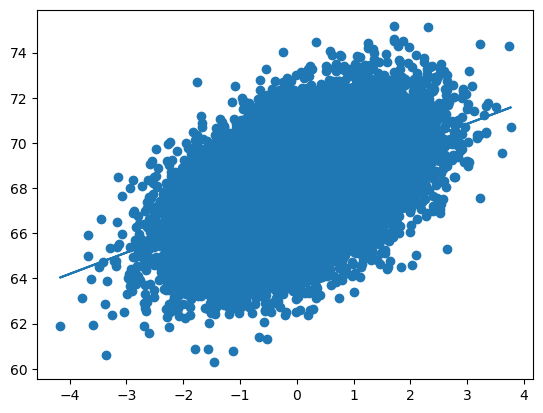

In [62]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [64]:
y_pred = regression.predict(X_test)

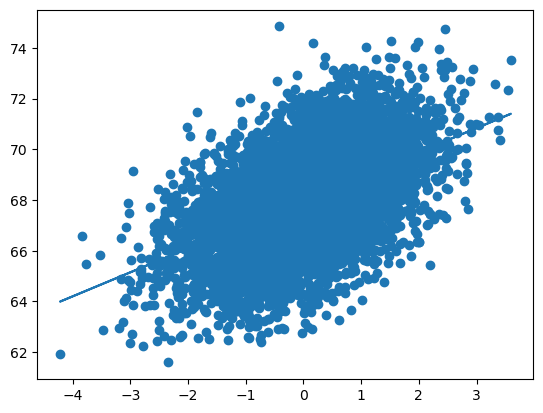

In [68]:

plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test))

In [70]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [74]:

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.7333807993730996
1.3166150322297803
1.6532939240719116


In [76]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [78]:

print(score)

0.2592643941428425


In [80]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.25914583850810224

In [84]:
regression.predict(scaler.transform([[75]]))

C:\Users\imsau\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([63.74539415])